In [2]:
from src import *


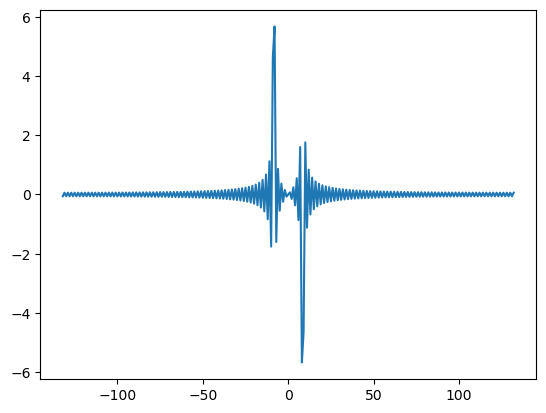

In [57]:
def dirichlet(t, n):
    return torch.sin((n+0.5) * t) / torch.sin(t / 2.)


def dmap_cos(k, b, N, convert_to_radians=True):
    n = torch.floor(N/2)
    if convert_to_radians:
        k = k.clone()*2*torch.pi/N

    if N%2 == 1:
        return torch.stack((
            1/(2*torch.sqrt(N))*(dirichlet(b-k, n) + dirichlet(-b-k, n)),
            torch.zeros_like(k)
        ), dim=-1)

    else:
        return torch.stack((
            1/(2*torch.sqrt(N))*(dirichlet(b-k, n) + dirichlet(-b-k, n)) - 1/(torch.sqrt(N))*torch.cos(b)*torch.cos(0.5*N*k),
            torch.zeros_like(k)
        ), dim=-1)

def dmap_sin(k, b, N, convert_to_radians=True):
    n = torch.floor(N/2)
    if convert_to_radians:
        k = k.clone()*2*torch.pi/N
    
    if N%2 == 1:
        return torch.stack((
            torch.zeros_like(k),
            1/(2*torch.sqrt(N))*(dirichlet(-b-k, n) - dirichlet(b-k, n))
        ), dim=-1)
    else:
        return torch.stack((
            (1/torch.sqrt(N))*torch.sin(b)*torch.cos(0.5*N*k),
            1/(2*torch.sqrt(N))*(dirichlet(-b-k, n) - dirichlet(b-k, n))
        ), dim=-1)


N = torch.tensor(265.)
n = torch.floor(N/2)
b = torch.tensor(0.2)

kp = torch.arange(-n, -n+N)
dfeature = dmap_sin(kp, b, N, convert_to_radians=True)

# plt.plot(t, dirichlet(t, torch.tensor(70.)))
plt.plot(kp, dfeature[:,1])

tensor(0.0079)


AssertionError: 

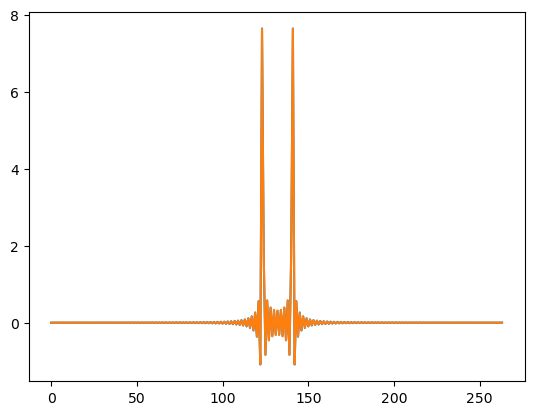

In [58]:
# test all configurations

# odd N
N = torch.tensor(265.)
n = torch.floor(N/2)
b = torch.tensor(0.2123)
kp = torch.arange(-n, -n+N)

xt = torch.stack((torch.cos(b*kp), torch.zeros_like(kp)), dim=-1)
xt_ft = fft1(xt)
dmap = dmap_cos(kp, b, N, convert_to_radians=True)
assert torch.max(torch.abs(dmap - xt_ft)) < 1e-5

xt = torch.stack((torch.sin(b*kp), torch.zeros_like(kp)), dim=-1)
xt_ft = fft1(xt)
dmap = dmap_sin(kp, b, N, convert_to_radians=True)
assert torch.max(torch.abs(dmap - xt_ft)) < 1e-5


# even N
N = torch.tensor(264.)
n = torch.floor(N/2)
b = torch.tensor(0.21)
kp = torch.arange(-n, -n+N)

xt = torch.stack((torch.cos(b*kp), torch.zeros_like(kp)), dim=-1)
xt_ft = fft1(xt)
dmap = dmap_cos(kp, b, N, convert_to_radians=True)

plt.plot(xt_ft[:,0])
plt.plot(dmap[:,0])

print(torch.max(torch.abs(dmap - xt_ft)))
assert torch.max(torch.abs(dmap - xt_ft)) < 1e-5


xt = torch.stack((torch.sin(b*kp), torch.zeros_like(kp)), dim=-1)
xt_ft = fft1(xt)
dmap = dmap_sin(kp, b, N, convert_to_radians=True)
assert torch.max(torch.abs(dmap - xt_ft)) < 1e-5



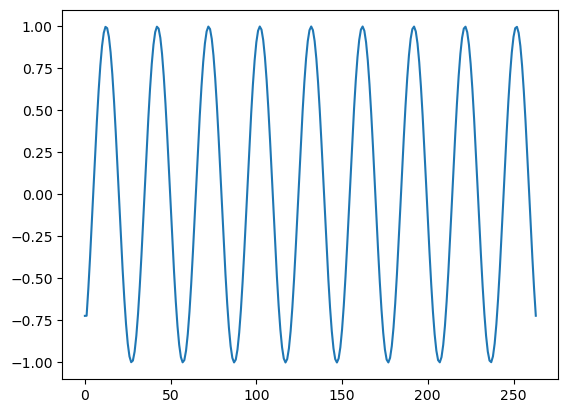

In [59]:
plt.plot(ifft1(dmap)[:,0].cpu())

In [24]:
N = torch.tensor(169.)
n = torch.floor(N / 2)

b = torch.tensor(.15)

def dirichlet(x, N):
    return (1. / N) * torch.sin((N / 2. + 1.)*x) / torch.sin(x / 2.)

k = -n + torch.arange(N)

dmap_cos = dirichlet(k / n + b, N) + dirichlet(k / n - b, N)

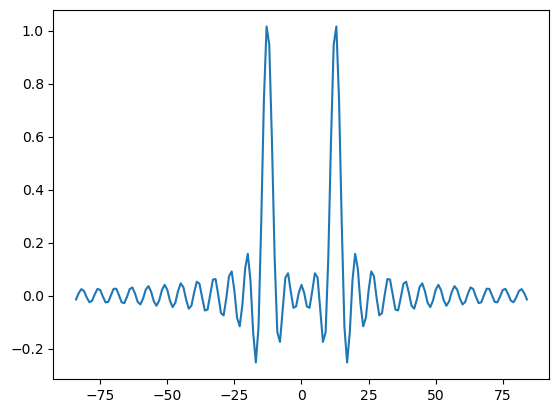

In [25]:
plt.plot(k, dmap_cos)

Text(0.5, 1.0, 'inverse FFT')

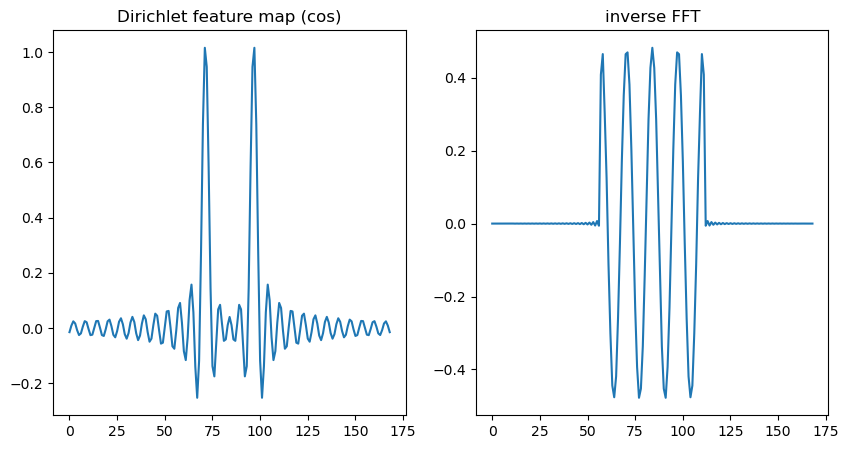

In [27]:
dmap_cos_ifft = ifft1(torch.stack((dmap_cos, torch.zeros_like(dmap_cos)), dim=-1))


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(dmap_cos)
ax.set_title("Dirichlet feature map (cos)")
ax = fig.add_subplot(122)
ax.plot(dmap_cos_ifft[...,0])
ax.set_title("inverse FFT")

Text(0.5, 1.0, 'inverse FFT')

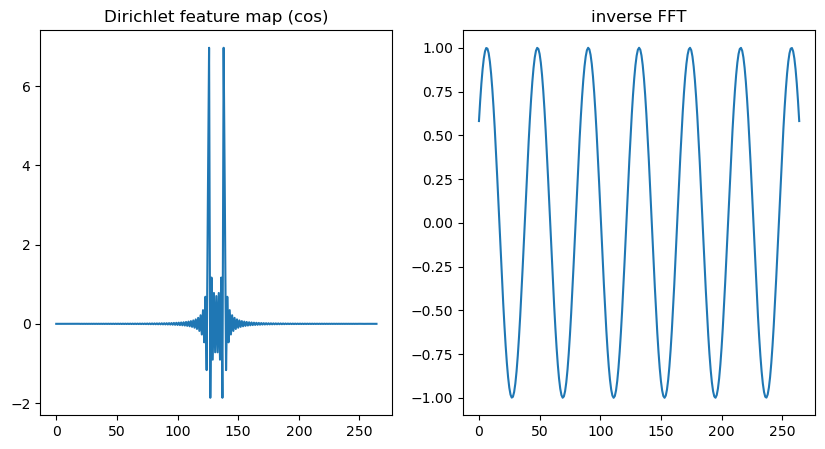

In [35]:
N = torch.tensor(265.)
n = torch.floor(N/2)
b = torch.tensor(0.15)
kp = torch.arange(-n, -n+N)

def dirichlet(t, n):
    return torch.sin((n+0.5) * t) / torch.sin(t / 2.)


def dmap_cos(k, b, N, convert_to_radians=True):
    n = torch.floor(N/2)
    if convert_to_radians:
        k = k.clone()*2*torch.pi/N

    if N%2 == 1:
        return torch.stack((
            1/(2*torch.sqrt(N))*(dirichlet(b-k, n) + dirichlet(-b-k, n)),
            torch.zeros_like(k)
        ), dim=-1)

    else:
        return torch.stack((
            1/(2*torch.sqrt(N))*(dirichlet(b-k, n) + dirichlet(-b-k, n)) - 1/(torch.sqrt(N))*torch.cos(b)*torch.cos(0.5*N*k),
            torch.zeros_like(k)
        ), dim=-1)
    
dmap = dmap_cos(kp, b, N, convert_to_radians=True)[...,0]
dmap_cos_ifft = ifft1(torch.stack((dmap, torch.zeros_like(dmap)), dim=-1))

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(dmap)
ax.set_title("Dirichlet feature map (cos)")
ax = fig.add_subplot(122)
ax.plot(dmap_cos_ifft[...,0])
ax.set_title("inverse FFT")
